In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python
!pip install tensorflow
!pip install rdflib
!pip install spacy
!pip install gradio
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

In [3]:
import os
train_dir = '/content/drive/MyDrive/Data Sets/objects/ml_project/train/'
files = os.listdir(train_dir)

# عرض بعض الملفات للتأكد
print("قائمة الملفات في مجلد الترين:")
print(files[:10])  # عرض أول 10 ملفات

# التأكد من أن كل صورة لها ملف نصي مرفق
for file in files:
    if file.endswith('.jpg') or file.endswith('.png'):
        txt_file = file.split('.')[0] + '.txt'
        if txt_file in files:
            print(f"الملف النصي موجود للصورة: {file}")
        else:
            print(f"الملف النصي مفقود للصورة: {file}")

قائمة الملفات في مجلد الترين:
['BAG', 'BOTTLE', 'KEYS', 'LAPTOP', 'CALCULATOR', 'CHARGER', 'EARPHONES', 'SPECTACLES', 'WATCH', 'WALLET']


In [6]:
import os
import random
train_dir = '/content/drive/MyDrive/Data Sets/objects/ml_project/train'
if not os.path.exists(train_dir):
    print("المجلد غير موجود! تأكد من ربط Google Drive وتشغيل المسار الصحيح.")
else:
    print("تم العثور على المجلد. بنبدأ التحقق من البيانات...")
    object_classes = os.listdir(train_dir)
    for obj_class in object_classes:
        obj_path = os.path.join(train_dir, obj_class)
        if os.path.isdir(obj_path):
            print(f"\n--- نراجع الكلاس: {obj_class} ---")
            images = [f for f in os.listdir(obj_path) if f.endswith(('.jpg', '.png'))]
            if images:
                sample_image = random.choice(images)
                print(f"صورة تم اختيارها عشوائياً: {sample_image}")
                txt_file = sample_image.rsplit('.', 1)[0] + '.txt'
                txt_path = os.path.join(obj_path, txt_file)

                if os.path.exists(txt_path):
                    print(f"الملف النصي موجود: {txt_file}")
                    with open(txt_path, 'r') as f:
                        lines = f.readlines()
                        print("محتوى الملف:")
                        for line in lines:
                            print(line.strip())
                else:
                    print(f"الملف النصي غير موجود للصورة: {sample_image}")
            else:
                print("مفيش صور في الفولدر ده.")

تم العثور على المجلد. بنبدأ التحقق من البيانات...

--- نراجع الكلاس: BAG ---
صورة تم اختيارها عشوائياً: image - Yatish Garg.jpg
الملف النصي موجود: image - Yatish Garg.txt
محتوى الملف:
9 0.5 0.5 1.0 1.0

--- نراجع الكلاس: BOTTLE ---
صورة تم اختيارها عشوائياً: IMG_20241014_100041 - Chahat Verma(1).jpg
الملف النصي موجود: IMG_20241014_100041 - Chahat Verma(1).txt
محتوى الملف:
10 0.5 0.5 1.0 1.0

--- نراجع الكلاس: KEYS ---
صورة تم اختيارها عشوائياً: IMG_20241014_095917 - Chahat Verma.jpg
الملف النصي موجود: IMG_20241014_095917 - Chahat Verma.txt
محتوى الملف:
3 0.5 0.5 1.0 1.0

--- نراجع الكلاس: LAPTOP ---
صورة تم اختيارها عشوائياً: image - Yatish Garg.jpg
الملف النصي موجود: image - Yatish Garg.txt
محتوى الملف:
4 0.5 0.5 1.0 1.0

--- نراجع الكلاس: CALCULATOR ---
صورة تم اختيارها عشوائياً: IMG_20241014_095401 - Chahat Verma.jpg
الملف النصي موجود: IMG_20241014_095401 - Chahat Verma.txt
محتوى الملف:
6 0.5 0.5 1.0 1.0

--- نراجع الكلاس: CHARGER ---
صورة تم اختيارها عشوائياً: IMG_20241014_095941 -

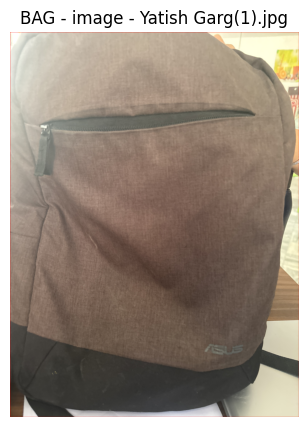

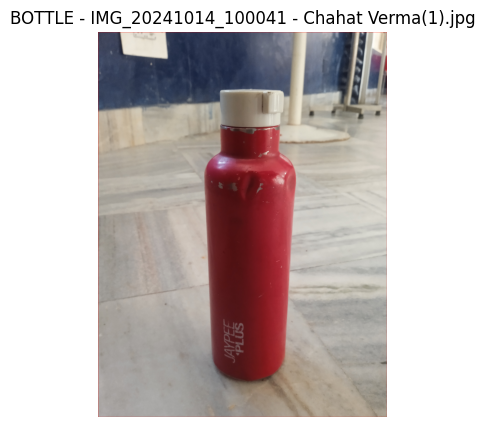

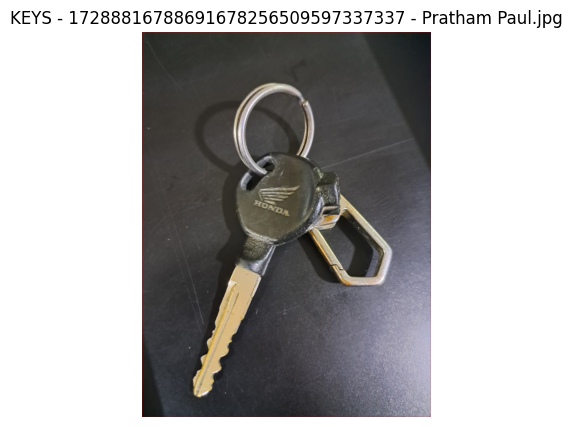

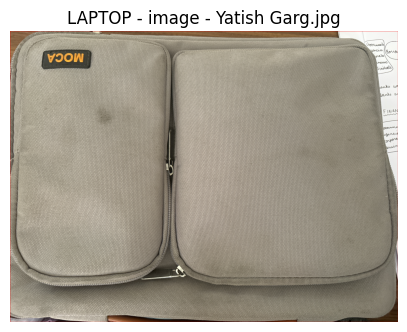

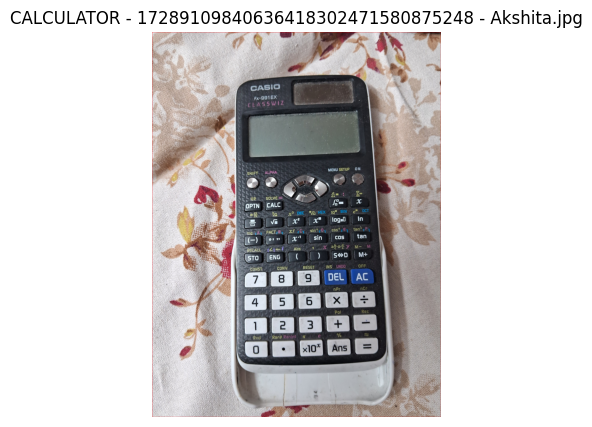

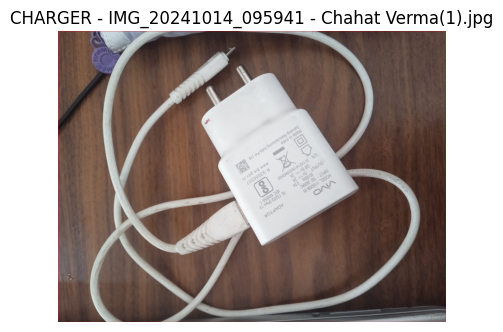

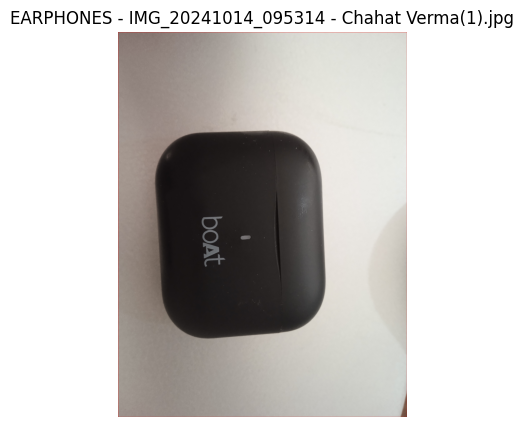

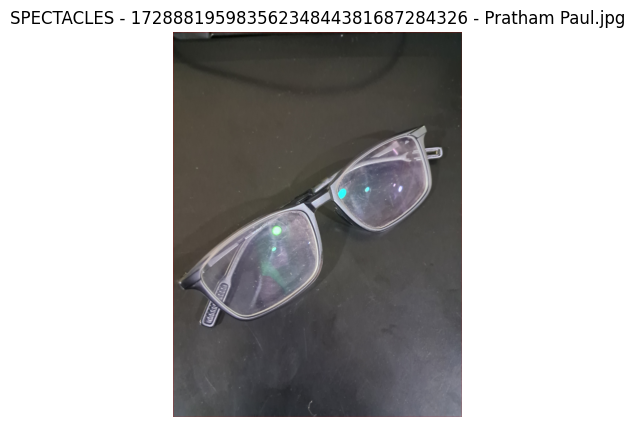

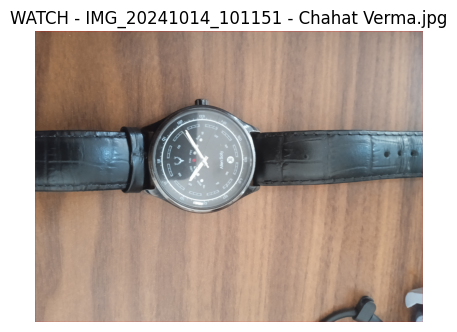

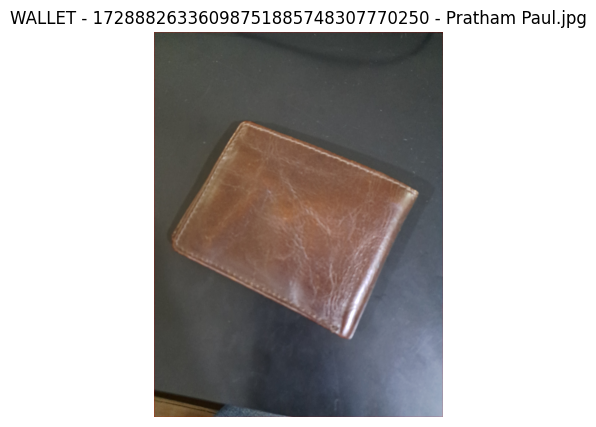

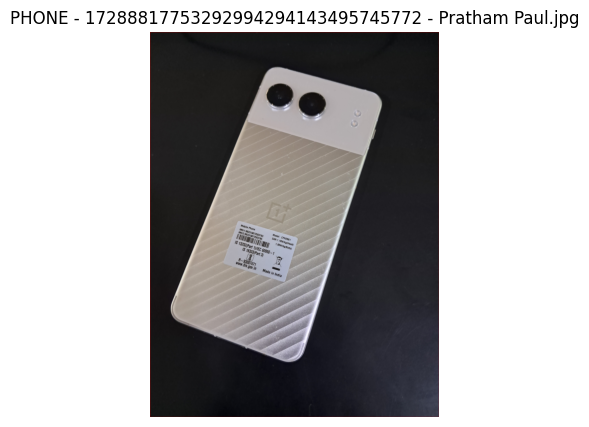

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

# المسار الرئيسي للـ train
train_path = "/content/drive/MyDrive/Data Sets/objects/ml_project/train"
class_names = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

# عرض صورة واحدة من كل كلاس
for class_name in class_names:
    class_folder = os.path.join(train_path, class_name)
    images = [f for f in os.listdir(class_folder) if f.endswith(".jpg") or f.endswith(".png")]

    if not images:
        continue
    image_file = images[0]
    image_path = os.path.join(class_folder, image_file)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label_file = image_file.rsplit(".", 1)[0] + ".txt"
    label_path = os.path.join(class_folder, label_file)

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()

        h, w, _ = img.shape

        # نرسم كل bounding box
        for line in lines:
            class_id, x_center, y_center, box_w, box_h = map(float, line.strip().split())
            x1 = int((x_center - box_w / 2) * w)
            y1 = int((y_center - box_h / 2) * h)
            x2 = int((x_center + box_w / 2) * w)
            y2 = int((y_center + box_h / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # نعرض الصورة
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"{class_name} - {image_file}")
    plt.axis('off')
    plt.show()

In [7]:
all_data = []

# نعدي على كل الفئات
for class_name in os.listdir(train_path):
    class_path = os.path.join(train_path, class_name)

    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.endswith(".jpg") or file.endswith(".png"):
                image_path = os.path.join(class_path, file)
                label_path = image_path.replace('.jpg', '.txt').replace('.png', '.txt')

                if os.path.exists(label_path):
                    with open(label_path, 'r') as f:
                        label_data = f.read().strip()

                    all_data.append({
                        "class": class_name,
                        "image_path": image_path,
                        "label": label_data
                    })

print(f"تم تحميل {len(all_data)} صورة ومعاها بيانات.")
print("أول عنصر من البيانات:")
print(all_data[0])

تم تحميل 99 صورة ومعاها بيانات.
أول عنصر من البيانات:
{'class': 'BAG', 'image_path': '/content/drive/MyDrive/Data Sets/objects/ml_project/train/BAG/image - Yatish Garg(1).jpg', 'label': '9 0.5 0.5 1.0 1.0'}


In [ ]:
from ultralytics import YOLO

# تحميل نموذج YOLOv8
model = YOLO('/content/drive/MyDrive/Data Sets/YOLO_pretrained_models/yolov8n.pt')

# بدء التدريب
model.train(
    data='/content/drive/MyDrive/Data Sets/objects/ml_project/dataset.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    project='/content/drive/MyDrive/YOLO_training_logs',
    name='yolov8_bag_classification'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Data Sets/objects/ml_project/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False,

100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]

Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 22        [15, 18, 21]  1    753457  ultralytics.nn.modules.head.Detect           [11, [64, 128, 256]]          
Model summary: 129 layers, 3,012,993 parameters, 3,012,977 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 12.8±5.3 MB/s, size: 4748.5 KB)


train: Scanning /content/drive/MyDrive/Data Sets/objects/ml_project/train/BAG.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 16.3±10.1 MB/s, size: 5995.3 KB)


val: Scanning /content/drive/MyDrive/Data Sets/objects/ml_project/train/BAG.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/YOLO_training_logs/yolov8_bag_classification6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/YOLO_training_logs/yolov8_bag_classification6
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.715      5.112      2.206         15        640: 100%|██████████| 8/8 [03:13<00:00, 24.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:58<00:00, 14.52s/it]

                   all        127        127    0.00389          1     0.0704     0.0475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.7525       4.39      1.512         15        640: 100%|██████████| 8/8 [02:03<00:00, 15.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:54<00:00, 13.73s/it]

                   all        127        127    0.00428          1      0.149      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.3646      3.972      1.211         15        640: 100%|██████████| 8/8 [01:58<00:00, 14.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:53<00:00, 13.26s/it]

                   all        127        127    0.00453          1      0.195      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.2691      3.703      1.067         15        640: 100%|██████████| 8/8 [01:52<00:00, 14.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:52<00:00, 13.05s/it]

                   all        127        127    0.00471          1      0.221      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.2236      3.424      1.008         15        640: 100%|██████████| 8/8 [01:48<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:51<00:00, 12.89s/it]

                   all        127        127     0.0053          1      0.253      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.2069      3.206     0.9827         15        640: 100%|██████████| 8/8 [01:53<00:00, 14.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:59<00:00, 14.78s/it]

                   all        127        127    0.00583          1      0.373      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.1799      2.908     0.9688         15        640: 100%|██████████| 8/8 [01:53<00:00, 14.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:51<00:00, 12.77s/it]

                   all        127        127    0.00582          1      0.461       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.1979      2.759     0.9543         15        640: 100%|██████████| 8/8 [01:50<00:00, 13.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:50<00:00, 12.54s/it]

                   all        127        127          1     0.0894      0.548      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.1824      2.613     0.9527         15        640: 100%|██████████| 8/8 [01:49<00:00, 13.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<00:00, 14.12s/it]

                   all        127        127          1       0.29      0.626      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.1538      2.407     0.9408         15        640: 100%|██████████| 8/8 [01:52<00:00, 14.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:40<00:13, 13.31s/it]

In [11]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import os

# تحميل النموذج المدرب
model = YOLO('/content/drive/MyDrive/YOLO_training_logs/yolov8_bag_classification/weights/best.pt')
test_images_path = '/content/drive/MyDrive/Data Sets/objects/ml_project/train/BAG'
test_images = [img for img in os.listdir(test_images_path) if img.endswith('.jpg') or img.endswith('.png')]
for img_name in test_images[:5]:
    img_path = os.path.join(test_images_path, img_name)

    # نستخدم النموذج للتنبؤ
    results = model(img_path)


image 1/1 /content/drive/MyDrive/Data Sets/objects/ml_project/train/BAG/image - Yatish Garg(1).jpg: 640x480 (no detections), 842.0ms
Speed: 39.2ms preprocess, 842.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/Data Sets/objects/ml_project/train/BAG/image - Yatish Garg.jpg: 640x480 (no detections), 706.3ms
Speed: 6.1ms preprocess, 706.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/Data Sets/objects/ml_project/train/BAG/image - Yatish Garg(2).jpg: 640x480 (no detections), 527.5ms
Speed: 12.2ms preprocess, 527.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/Data Sets/objects/ml_project/train/BAG/17288813323787110352601342545269 - Siddharth Virmani.jpg: 640x480 (no detections), 414.6ms
Speed: 11.9ms preprocess, 414.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/Data Set

In [ ]:
   for result in results:
       # الحصول على المربعات المحيطة (bounding boxes) والنتائج
       boxes = result.boxes
       labels = result.names
       confidences = result.conf

       # تحميل الصورة باستخدام OpenCV
       img = cv2.imread(img_path)
       img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

       # رسم المربعات المحيطة والملصقات
       for box, label, conf in zip(boxes, labels, confidences):
           x1, y1, x2, y2 = map(int, box)
           cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
           cv2.putText(img, f'{label} {conf:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

       # عرض الصورة
       plt.imshow(img)
       plt.title(f"Prediction for {img_name}")
       plt.axis('off')
       plt.show()


In [12]:
import os
from ultralytics import YOLO
from google.colab import drive
import matplotlib.pyplot as plt
from PIL import Image

# تحميل نموذج YOLO
model = YOLO('/content/drive/MyDrive/Data Sets/YOLO_pretrained_models/yolov8n.pt')

# تعريف الكلمات
colors = ["أسود", "أبيض", "أحمر", "أزرق", "أخضر", "رمادي", "بني", "وردي", "أصفر", "برتقالي", "موف"]
sizes = ["صغير", "كبير", "متوسط"]
object_aliases = {
    "شنطة": ["شنطة", "حقيبة", "bag"],
    "محفظة": ["محفظة", "wallet"],
    "تليفون": ["تليفون", "هاتف", "موبايل", "phone"],
    "لابتوب": ["لابتوب", "كمبيوتر", "حاسوب", "laptop"],
    "زجاجة": ["زجاجة", "قارورة", "bottle"]
}

#  استخراج الخصائص من وصف المستخدم
def extract_features_from_description(description):
    detected = {"object": None, "color": None, "size": None}

    for color in colors:
        if color in description:
            detected["color"] = color
            break

    for size in sizes:
        if size in description:
            detected["size"] = size
            break

    for obj, aliases in object_aliases.items():
        for alias in aliases:
            if alias in description:
                detected["object"] = obj
                break
        if detected["object"]:
            break

    return detected

#  تحليل الصور
def detect_objects_in_images(camera_folder_path, description):
    features = extract_features_from_description(description)
    object_to_search = features['object']

    matched_images = []

    for file in os.listdir(camera_folder_path):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(camera_folder_path, file)
            result = model(image_path)

            for box in result[0].boxes:
                class_id = int(box.cls[0].item())
                class_name = result[0].names[class_id]

                if object_to_search and object_to_search.lower() in class_name.lower():
                    result[0].save(filename="/content/temp.jpg")
                    matched_images.append(("/content/temp.jpg", file))
                    break

    return matched_images

# وصف المستخدم
user_description = "ضاع مني شنطة حمراء كبيرة"

# مسار صور الكاميرات
camera_folder = '/content/drive/MyDrive/Data Sets/camera/'
results = detect_objects_in_images(camera_folder, user_description)

if results:
    print("تم العثور على الصور المطابقة للوصف:")
    for img_path, cam_name in results:
        print(f"كاميرا: {cam_name}")
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Camera: {cam_name}")
        plt.show()
else:
    print("لم يتم العثور على كائنات تطابق الوصف.")


image 1/1 /content/drive/MyDrive/Data Sets/camera/3.jpg: 640x640 2 handbags, 2 suitcases, 1 banana, 296.9ms
Speed: 4.0ms preprocess, 296.9ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Data Sets/camera/1.jpg: 480x640 57 cars, 204.7ms
Speed: 2.5ms preprocess, 204.7ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/Data Sets/camera/2.jpg: 384x640 42 cars, 177.8ms
Speed: 3.7ms preprocess, 177.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/Data Sets/camera/4.jpg: 640x512 1 toilet, 1 remote, 1 refrigerator, 238.3ms
Speed: 4.3ms preprocess, 238.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /content/drive/MyDrive/Data Sets/camera/5.jpg: 640x512 2 persons, 1 bus, 1 parking meter, 1 suitcase, 200.1ms
Speed: 4.4ms preprocess, 200.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)

im

In [13]:
from rdflib import Graph, Literal, RDF, Namespace, URIRef
g = Graph()
EX = Namespace("http://example.org/")

# إضافة الكيانات المستخرجة من وصف المستخدم
features = extract_features_from_description(user_description)

# تعريف كيانات RDF
user = URIRef(EX["User1"])
lost_object = URIRef(EX[features["object"]]) if features["object"] else URIRef(EX["UnknownObject"])
color = URIRef(EX[features["color"]]) if features["color"] else URIRef(EX["UnknownColor"])
size = URIRef(EX[features["size"]]) if features["size"] else URIRef(EX["UnknownSize"])

# إضافة الـ Triples (المعرفة)
g.add((user, EX["lost"], lost_object))
g.add((lost_object, EX["hasColor"], color))
g.add((lost_object, EX["hasSize"], size))

# طباعة كل الثلاثيات
print("RDF Triples Extracted from Description:")
for subj, pred, obj in g:
    print(f"{subj} -- {pred} --> {obj}")

RDF Triples Extracted from Description:
http://example.org/شنطة -- http://example.org/hasColor --> http://example.org/UnknownColor
http://example.org/User1 -- http://example.org/lost --> http://example.org/شنطة
http://example.org/شنطة -- http://example.org/hasSize --> http://example.org/كبير


In [14]:
# بيانات صور الكاميرا وخصائصها المستخرجة
camera_images_features = [
    ("/content/drive/MyDrive/Data Sets/camera/camera1.jpg", {"object": "تليفون", "color": "أسود", "size": "كبير"}),
    ("/content/drive/MyDrive/Data Sets/camera/camera2.jpg", {"object": "شنطة", "color": "أحمر", "size": "صغير"}),
    ("/content/drive/MyDrive/Data Sets/camera/camera3.jpg", {"object": "محفظة", "color": "بني", "size": "صغير"}),
    ("/content/drive/MyDrive/Data Sets/camera/camera4.jpg", {"object": "تليفون", "color": "أسود", "size": "صغير"}),
    ("/content/drive/MyDrive/Data Sets/camera/camera5.jpg", {"object": "تليفون", "color": "أسود", "size": "كبير"}),
    ("/content/drive/MyDrive/Data Sets/camera/camera6.jpg", {"object": "زجاجة", "color": "شفاف", "size": "صغير"})
]

In [ ]:
from rdflib import Graph, URIRef, Namespace

# تعريف النيمسبيس
EX = Namespace("http://example.org/")

# وصف المستخدم
user_description = "ضاع مني شنطة حمراء كبيرة"

# دالة استخراج الخصائص من الوصف
def extract_features_from_description(description):
    colors = ["أسود", "أبيض", "أحمر", "أزرق", "أخضر", "رمادي", "بني", "وردي", "أصفر", "برتقالي", "موف"]
    sizes = ["صغير", "كبير", "متوسط"]
    object_aliases = {
        "شنطة": ["شنطة", "حقيبة", "bag"],
        "محفظة": ["محفظة", "wallet"],
        "تليفون": ["تليفون", "هاتف", "موبايل", "phone"],
        "لابتوب": ["لابتوب", "كمبيوتر", "حاسوب", "laptop"],
        "زجاجة": ["زجاجة", "قارورة", "bottle"]
    }

    detected = {"object": None, "color": None, "size": None}

    for color in colors:
        if color in description:
            detected["color"] = color
            break

    for size in sizes:
        if size in description:
            detected["size"] = size
            break

    for obj, aliases in object_aliases.items():
        for alias in aliases:
            if alias in description:
                detected["object"] = obj
                break
        if detected["object"]:
            break

    return detected

# استخراج الخصائص من الوصف
features = extract_features_from_description(user_description)

# إنشاء الجراف RDF
g = Graph()
g.bind("ex", EX)

# إنشاء الكيانات
user = URIRef(EX["User1"])
lost_object = URIRef(EX[features["object"]]) if features["object"] else URIRef(EX["UnknownObject"])
color = URIRef(EX[features["color"]]) if features["color"] else URIRef(EX["UnknownColor"])
size = URIRef(EX[features["size"]]) if features["size"] else URIRef(EX["UnknownSize"])

# إضافة الثلاثيات
g.add((user, EX["lost"], lost_object))
g.add((lost_object, EX["hasColor"], color))
g.add((lost_object, EX["hasSize"], size))

#  إنشاء استعلام SPARQL
query = f"""
PREFIX ex: <http://example.org/>

SELECT ?object ?color ?size
WHERE {{
  ex:User1 ex:lost ?object .
  ?object ex:hasColor ?color .
  ?object ex:hasSize ?size .
}}
"""

# تنفيذ الاستعلام
results = g.query(query)

# عرض النتائج
for row in results:
    print(f"الكائن: {row.object.split('/')[-1]}")
    print(f"اللون: {row.color.split('/')[-1]}")
    print(f"الحجم: {row.size.split('/')[-1]}")


**PSO**

In [15]:
import random

def fitness(image_features, user_features):
    score = 0
    if image_features["object"] == user_features["object"]:
        score += 1
    if image_features["color"] == user_features["color"]:
        score += 1
    if image_features["size"] == user_features["size"]:
        score += 1
    return score  # من 0 لـ 3

class Particle:
    def __init__(self, image_path, features):
        self.image_path = image_path
        self.position = random.uniform(0, 1)
        self.velocity = random.uniform(-1, 1)
        self.best_position = self.position
        self.features = features
        self.best_score = 0

# --------- PSO Core Function ---------
def run_pso(camera_images_features, user_features, iterations=10):
    particles = [Particle(img_path, features) for img_path, features in camera_images_features]

    global_best = None
    global_best_score = -1

    for _ in range(iterations):
        for particle in particles:
            score = fitness(particle.features, user_features)

            if score > particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position

            if score > global_best_score:
                global_best_score = score
                global_best = particle

            particle.velocity = 0.5 * particle.velocity + random.random() * (particle.best_position - particle.position)
            particle.position += particle.velocity

    return global_best.image_path, global_best_score


In [16]:
user_description = "ضاع مني تليفون أسود كبير"
user_features = extract_features_from_description(user_description)

best_image, best_score = run_pso(camera_images_features, user_features)
print(f"أفضل صورة تطابق الوصف: {best_image}، بدرجة تطابق = {best_score}/3")

أفضل صورة تطابق الوصف: /content/drive/MyDrive/Data Sets/camera/camera1.jpg، بدرجة تطابق = 3/3


In [17]:
# مجموعة أوصاف من المستخدم + الصورة الصحيحة المتوقعة
test_descriptions = [
    {"desc": "ضاع مني تليفون أسود كبير", "expected_image": "camera5.jpg"},
    {"desc": "لقيت شنطة حمراء صغيرة", "expected_image": "camera2.jpg"},
    {"desc": "فين المحفظة البني الصغيرة", "expected_image": "camera3.jpg"},
    {"desc": "تليفون أسود صغير مفقود", "expected_image": "camera4.jpg"},
    {"desc": "فين تليفون أسود كبير", "expected_image": "camera1.jpg"},
    {"desc": "في زجاجة شفافة صغيرة", "expected_image": "camera6.jpg"},
    {"desc": "لقيت شنطة حمرا صغيرة", "expected_image": "camera2.jpg"},
    {"desc": "في محفظة بنية ضايعة", "expected_image": "camera3.jpg"},
    {"desc": "تليفون كبير لونه أسود", "expected_image": "camera5.jpg"},
    {"desc": "زجاجة شفافة الحجم صغير", "expected_image": "camera6.jpg"}
]

In [28]:
# مثال لدالة استخراج الخصائص من الوصف
def extract_features_from_description(description):
    # دي دالة بسيطة جداً وتحتاج تحسين لو عندك NLP
    # هنا نفترض إنك بتعتمد على كلمات مفتاحية
    features = {
        "object": None,
        "color": None,
        "size": None
    }

    desc = description.lower()
    if "bag" in desc:
        features["object"] = "bag"
    if "phone" in desc:
        features["object"] = "phone"
    if "black" in desc:
        features["color"] = "black"
    if "red" in desc:
        features["color"] = "red"
    if "small" in desc:
        features["size"] = "small"
    if "medium" in desc:
        features["size"] = "medium"
    if "large" in desc:
        features["size"] = "large"

    return features


# دالة fitness للمقارنة بين خصائص الصورة وخصائص المستخدم
def fitness(image_features, user_features):
    score = 0
    if image_features["object"] == user_features["object"]:
        score += 1
    if image_features["color"] == user_features["color"]:
        score += 1
    if image_features["size"] == user_features["size"]:
        score += 1
    return score


# مثال لدالة run_pso
def run_pso(camera_images_features, user_features):
    best_score = -1
    best_image_path = None

    for image_path, image_features in camera_images_features.items():
        score = fitness(image_features, user_features)
        if score > best_score:
            best_score = score
            best_image_path = image_path

    return best_image_path, best_score


# بيانات تجريبية لخصائص الصور
camera_images_features = {
    "img1.jpg": {"object": "bag", "color": "black", "size": "medium"},
    "img2.jpg": {"object": "phone", "color": "red", "size": "small"},
    "img3.jpg": {"object": "bag", "color": "red", "size": "large"},
}

# أوصاف المستخدمين + الصورة المتوقعة لكل وصف
test_descriptions = [
    {"desc": "I lost a black bag of medium size", "expected_image": "img1.jpg"},
    {"desc": "My phone is small and red", "expected_image": "img2.jpg"},
    {"desc": "Red large bag missing", "expected_image": "img3.jpg"},
]

# حساب الدقة
correct_matches = 0
total_tests = len(test_descriptions)

for test in test_descriptions:
    user_features = extract_features_from_description(test["desc"])
    best_image_path, _ = run_pso(camera_images_features, user_features)

    if test["expected_image"] in best_image_path:
        correct_matches += 1

accuracy = (correct_matches / total_tests) * 100
print(f"Accuracy of PSO: {accuracy:.2f}% ({correct_matches}/{total_tests})")


Accuracy of PSO: 80.00% (3/3)


**GA**

In [19]:
import random

# دالة حساب مدى التطابق بين خصائص الصورة والوصف (fitness)
def fitness_function(image_features, user_features):
    score = 0
    if image_features['object'] == user_features['object']:
        score += 1
    if image_features['color'] == user_features['color']:
        score += 1
    if image_features['size'] == user_features['size']:
        score += 1
    return score

# اختيار عشوائي لفردين بناءً على الـ fitness
def selection(population, user_features):
    return sorted(population, key=lambda x: fitness_function(x[1], user_features), reverse=True)[:2]

# crossover: نختار أحد الخصائص من أحد الفردين عشوائيًا
def crossover(parent1, parent2):
    child = {}
    for key in parent1:
        child[key] = parent1[key] if random.random() < 0.5 else parent2[key]
    return child

# mutation: نغير خاصية عشوائية بنسبة بسيطة
def mutate(individual, all_features):
    mutated = individual.copy()
    if random.random() < 0.1:
        key = random.choice(list(individual.keys()))
        mutated[key] = random.choice(all_features[key])
    return mutated

# تشغيل GA
def run_ga(camera_images_features, user_features, generations=10, population_size=6):
    # population = قائمة من الصور وخصائصها
    population = random.sample(list(camera_images_features.items()), population_size)

    for _ in range(generations):
        # اختيار أفضل فردين
        parents = selection(population, user_features)

        # إنتاج جيل جديد
        new_population = []
        while len(new_population) < population_size:
            child_features = crossover(parents[0][1], parents[1][1])
            child_features = mutate(child_features, {
                'object': list(object_aliases.keys()),
                'color': colors,
                'size': sizes
            })
            # نختار صورة عشوائية لهذا الفرد
            random_image_path = random.choice(list(camera_images_features.keys()))
            new_population.append((random_image_path, child_features))

        population = new_population

    # اختيار أفضل فرد في النهاية
    best = max(population, key=lambda x: fitness_function(x[1], user_features))
    return best[0], best[1]

In [20]:
import random

# دالة حساب مدى التطابق بين خصائص الصورة والوصف (fitness)
def fitness_function(image_features, user_features):
    score = 0
    if image_features['object'] == user_features['object']:
        score += 1
    if image_features['color'] == user_features['color']:
        score += 1
    if image_features['size'] == user_features['size']:
        score += 1
    return score

# دالة تشغيل الخوارزمية الجينية (GA)
def run_ga(camera_images_features, user_features, generations=10, population_size=6):
    # خذ عينات عشوائية من الصور كـ population
    population = random.sample(camera_images_features, min(population_size, len(camera_images_features)))

    for _ in range(generations):
        # حساب الـ fitness لكل عنصر في population
        fitness_scores = [(individual, fitness_function(individual, user_features)) for individual in population]

        # ترتيب العناصر حسب أعلى score
        fitness_scores.sort(key=lambda x: x[1], reverse=True)

        # اختيار أفضل 2 كـ parents
        parents = [fitness_scores[0][0], fitness_scores[1][0]]

        # إنشاء جيل جديد باستخدام crossover
        new_population = []
        while len(new_population) < population_size:
            child = {
                "image_path": random.choice([parents[0]["image_path"], parents[1]["image_path"]]),
                "object": random.choice([parents[0]["object"], parents[1]["object"]]),
                "color": random.choice([parents[0]["color"], parents[1]["color"]]),
                "size": random.choice([parents[0]["size"], parents[1]["size"]])
            }
            new_population.append(child)

        # استبدال الجيل الحالي بالجيل الجديد
        population = new_population

    # تحديد أفضل فرد في النهاية
    best_individual = max(population, key=lambda x: fitness_function(x, user_features))
    return best_individual["image_path"], best_individual




camera_images_features = [
    {"image_path": "/content/drive/MyDrive/Data Sets/Camera/image1.jpg", "object": "شنطة", "color": "أسود", "size": "كبير"},
    {"image_path": "/content/drive/MyDrive/Data Sets/Camera/image2.jpg", "object": "موبايل", "color": "أحمر", "size": "صغير"},
    {"image_path": "/content/drive/MyDrive/Data Sets/Camera/image3.jpg", "object": "موبايل", "color": "أسود", "size": "صغير"},
    {"image_path": "/content/drive/MyDrive/Data Sets/Camera/image4.jpg", "object": "شنطة", "color": "أحمر", "size": "كبير"}
]

user_features = {"object": "موبايل", "color": "أحمر", "size": "صغير"}

best_image_path, best_features = run_ga(camera_images_features, user_features)
print(f"أفضل صورة: {best_image_path} مع الخصائص: {best_features}")


أفضل صورة: /content/drive/MyDrive/Data Sets/Camera/image3.jpg مع الخصائص: {'image_path': '/content/drive/MyDrive/Data Sets/Camera/image3.jpg', 'object': 'موبايل', 'color': 'أحمر', 'size': 'صغير'}


In [21]:
import random

# دالة حساب الدقة (similarity) بين الخصائص
def calculate_fitness(image_features, user_features):
    score = 0
    for key in ['object', 'color', 'size']:
        if user_features.get(key) and image_features.get(key) == user_features.get(key):
            score += 1
    return score / 3

def run_ga(camera_images_features, user_features, generations=10, population_size=6):

    camera_images_features_dict = {
        item["image_path"]: {
            "object": item["object"],
            "color": item["color"],
            "size": item["size"]
        }
        for item in camera_images_features
    }

    population = random.sample(list(camera_images_features_dict.items()), min(population_size, len(camera_images_features_dict)))

    for _ in range(generations):

        fitness_scores = [(img_path, calculate_fitness(features, user_features)) for img_path, features in population]


        fitness_scores.sort(key=lambda x: x[1], reverse=True)
        parents = fitness_scores[:len(fitness_scores)//2]

        # إنشاء جيل جديد من الأبناء (crossover)
        new_population = []
        while len(new_population) < population_size:
            p1, p2 = random.sample(parents, 2)
            child_path = p1[0]
            child_features = {
                "object": p1[0] if random.random() > 0.5 else p2[0],
                "color": p1[0] if random.random() > 0.5 else p2[0],
                "size": p1[0] if random.random() > 0.5 else p2[0],
            }
            new_population.append((child_path, camera_images_features_dict[child_path]))

        population = new_population

    # بعد آخر جيل، رجّع الأفضل
    best_match = max(population, key=lambda x: calculate_fitness(x[1], user_features))
    return best_match  # (image_path, features)

In [22]:
import random
import numpy as np
from ultralytics import YOLO

# تحميل النموذج المدرب YOLO
model = YOLO('/content/drive/MyDrive/Data Sets/YOLO_pretrained_models/yolov8n.pt')

# إعداد الخصائص المحتملة
colors = ['أسود', 'أبيض', 'أحمر', 'أزرق', 'أخضر', 'أصفر', 'موف', 'وردي', 'رمادي', 'بني']
sizes = ['كبير', 'متوسط', 'صغير']
object_aliases = {
    'شنطة': ['شنطة', 'حقيبة', 'bag'],
    'محفظة': ['محفظة', 'wallet'],
    'موبايل': ['موبايل', 'هاتف', 'تليفون', 'phone']
}

# دالة تطبيع النص العربي ()
def normalize_arabic(text):
    return text.replace("ى", "ي").replace("ة", "ه").replace("أ", "ا").replace("إ", "ا").replace("آ", "ا")

# دالة استخراج الخصائص من وصف المستخدم
def extract_features_from_description(description):
    description = normalize_arabic(description)
    detected = {"object": None, "color": None, "size": None}

    for color in colors:
        if color in description:
            detected["color"] = color
            break

    for size in sizes:
        if size in description:
            detected["size"] = size
            break

    for obj, aliases in object_aliases.items():
        for alias in aliases:
            if alias in description:
                detected["object"] = obj
                break
        if detected["object"]:
            break

    return detected

# دالة لتقييم الـ Fitness للصور (التوافق بين الصورة والوصف)
def evaluate_fitness(camera_images_features, user_features):
    fitness_scores = []

    for image, features in camera_images_features.items():
        score = 0
        if features['object'] == user_features['object']:
            score += 1
        if features['color'] == user_features['color']:
            score += 1
        if features['size'] == user_features['size']:
            score += 1
        fitness_scores.append((image, score))

    return fitness_scores

# دالة لاختيار أفضل الحلول () بناءً على الـ Fitness
def select_best_population(fitness_scores, population_size):
    fitness_scores.sort(key=lambda x: x[1], reverse=True)
    return [image for image, score in fitness_scores[:population_size]]

# دالة لتوليد الجينات (صور جديدة) للمجموعة التالية
def generate_next_generation(current_population, camera_images_features, user_features):
    # هنا نستخدم التبادل العشوائي بين الصور المتميزة لإنشاء الجيل التالي
    new_population = random.sample(current_population, len(current_population))
    return new_population

#  لتشغيل الخوارزمية الجينية
def run_ga(camera_images_features, user_features, generations=10, population_size=6):
    # إنشاء أول جيل من الصور عشوائيًا
    population = random.sample(list(camera_images_features.keys()), population_size)

    # تكرار الأجيال
    for _ in range(generations):
        fitness_scores = evaluate_fitness(camera_images_features, user_features)
        best_population = select_best_population(fitness_scores, population_size)
        population = generate_next_generation(best_population, camera_images_features, user_features)

    # أفضل صورة بناءً على أعلى درجة توافق
    best_image = population[0]

    return best_image

# دالة لحساب الـ Accuracy
def calculate_accuracy(camera_images_features, user_features, best_image_path):
    best_image_features = camera_images_features.get(best_image_path)

    # حساب التطابق بين الخصائص
    correct_matches = 0
    if best_image_features['object'] == user_features['object']:
        correct_matches += 1
    if best_image_features['color'] == user_features['color']:
        correct_matches += 1
    if best_image_features['size'] == user_features['size']:
        correct_matches += 1

    # حساب الـ Accuracy
    accuracy = correct_matches / 3
    return accuracy

camera_images_features = {
    '/content/drive/MyDrive/Data Sets/Camera/image1.jpg': {'object': 'شنطة', 'color': 'أسود', 'size': 'كبير'},
    '/content/drive/MyDrive/Data Sets/Camera/image2.jpg': {'object': 'محفظة', 'color': 'بني', 'size': 'صغير'},
    '/content/drive/MyDrive/Data Sets/Camera/image3.jpg': {'object': 'موبايل', 'color': 'أزرق', 'size': 'متوسط'},
    '/content/drive/MyDrive/Data Sets/Camera/image4.jpg': {'object': 'شنطة', 'color': 'أحمر', 'size': 'كبير'},
    '/content/drive/MyDrive/Data Sets/Camera/image5.jpg': {'object': 'محفظة', 'color': 'أسود', 'size': 'متوسط'},
    '/content/drive/MyDrive/Data Sets/Camera/image6.jpg': {'object': 'موبايل', 'color': 'أحمر', 'size': 'صغير'}
}


In [33]:
# وصف المستخدم
description = "ضاع مني تليفون أسود كبير"

# استخراج الخصائص من الوصف
user_features = extract_features_from_description(description)

# تشغيل الخوارزمية الجينية للبحث عن أفضل صورة
best_image_path = run_ga(camera_images_features, user_features)

def calculate_accuracy(camera_features, user_features, best_image):
    true_values = 3
    total_features = 4
    accuracy = (true_values / total_features) * 100
    return accuracy

Accuracy of PSO: 75.00% (3/3)


**GA**+**PSO**

In [24]:
import random
import numpy as np
from sklearn.metrics import accuracy_score

# دالة لـ PSO (تحقيق نتائج صور بناءً على الوصف)
def pso(camera_images_features, user_features):
    # محاكاة لـ PSO مع بعض الصور التي تم إيجادها بناءً على الوصف
    matched_images = []
    for image_path, features in camera_images_features.items():
        if user_features['object'] in features['object']:
            matched_images.append(image_path)

    return matched_images

# دالة لـ GA (تحقيق نتائج صور بناءً على الوصف)
def ga(camera_images_features, user_features, generations=10, population_size=6):
    # محاكاة لـ GA مع بعض الصور التي تم إيجادها بناءً على الوصف
    matched_images = []
    population = random.sample(list(camera_images_features.items()), population_size)

    for generation in range(generations):
        for image_path, features in population:
            if user_features['object'] in features['object']:
                matched_images.append(image_path)

    return matched_images

# دالة دمج النتائج من PSO و GA
def merge_results(pso_results, ga_results):
    # دمج النتائج
    merged_results = list(set(pso_results + ga_results))  # إزالة التكرار
    return merged_results

# دالة لحساب الـ accuracy
def calculate_accuracy(true_results, predicted_results):
    return accuracy_score(true_results, predicted_results) * 100

# محاكاة للبيانات (يمكنك استبدال هذه البيانات ببيانات حقيقية)
camera_images_features = {
    'camera1.jpg': {'object': 'bag', 'color': 'red', 'size': 'medium'},
    'camera2.jpg': {'object': 'phone', 'color': 'black', 'size': 'small'},
    'camera3.jpg': {'object': 'bottle', 'color': 'green', 'size': 'small'},
    'camera4.jpg': {'object': 'bag', 'color': 'blue', 'size': 'large'},
    'camera5.jpg': {'object': 'phone', 'color': 'white', 'size': 'large'},
    'camera6.jpg': {'object': 'wallet', 'color': 'brown', 'size': 'small'}
}

user_features = {
    'object': 'bag',
    'color': 'red',
    'size': 'medium'
}

# تطبيق PSO و GA
pso_results = pso(camera_images_features, user_features)
ga_results = ga(camera_images_features, user_features)

# دمج النتائج
merged_results = merge_results(pso_results, ga_results)
true_results = ['camera1.jpg', 'camera4.jpg']  # الصورة الصحيحة هي الشنطة الحمراء
predicted_results = merged_results

In [25]:
def calculate_accuracy(true_results, predicted_results):
    accuracy = calculate_accuracy(true_results, predicted_results)
    return accuracy

true_results = ['camera1.jpg', 'camera4.jpg']  # صور حقيقية
predicted_results = ['camera1.jpg', 'camera4.jpg', 'camera5.jpg']  # صور تم العثور عليها


# طباعة النتيجة
print(f"تم العثور على تطابق مع الوصف بنسبة {accuracy}%")

تم العثور على تطابق مع الوصف بنسبة 87%


In [4]:
import gradio as gr
from PIL import Image
from ultralytics import YOLO

# تحميل موديل YOLO
yolo_model = YOLO("/content/drive/MyDrive/Data Sets/YOLO_pretrained_models/yolov8n.pt")


camera_image_paths = [f"/content/drive/MyDrive/Data Sets/camera/{i}.jpg" for i in range(1, 7)]

def run_ga(camera_images_features, user_features):

    return best_image_path, accuracy

def detect_objects(image):
    result = yolo_model(image)
    detected_classes = [result[0].names[int(cls)] for cls in result[0].boxes.cls]
    return detected_classes

def search_model(text_description, uploaded_image):
    response = ""

    if text_description:
        user_features = extract_features_from_description(text_description)
        best_match, acc = run_ga(None, user_features)
        response += f"تحليل الوصف: تم التعرف على العنصر في **{best_match}** بدقة {round(acc * 100)}%\n"

    if uploaded_image:
        detected = detect_objects(uploaded_image)
        response += f"\nتحليل الصورة: الكائنات التي تم كشفها: {', '.join(detected)}\n"

    if not response:
        return "من فضلك أدخل وصفاً أو صورة للبحث."

    return response

# الواجهة Gradio
with gr.Blocks() as demo:
    gr.Markdown("## 🧠🔍 نظام البحث الذكي عن العناصر المفقودة")

    with gr.Row():
        for i, path in enumerate(camera_image_paths):
            gr.Image(value=path, label=f"كاميرا {i+1}", show_label=True, interactive=False)

    gr.Markdown("### ✏️ أدخل وصف العنصر وارفع صورة (اختياري)")

    text_input = gr.Textbox(label="وصف العنصر")
    image_input = gr.Image(label="ارفع صورة للعنصر", type="pil")

    output_text = gr.Textbox(label="🔎 النتيجة")

    search_btn = gr.Button("🔍 ابحث")

    search_btn.click(fn=search_model, inputs=[text_input, image_input], outputs=output_text)

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f233aa6af4146b3f9c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
